In [1]:
pip install empyrial

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.5 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [65]:
from empyrial import empyrial, Engine

In [77]:
portfolio = Engine(    
                  start_date= "2024-03-01", #start date for the backtesting
                  portfolio= ["TMF","SMIN","TSM","FLIN"], #assets in your portfolio 
                  weights = [0.25, 0.25, 0.25, 0.25], #equal weighting is set by default
                  benchmark = ["SPY"] #NIFTY50 is set by default)
)

In [69]:

#start_date: start date for the backtesting (format: YYYY/MM/DD)
#end_date: end date for the backtesting. The end date is by default today's date. (format: YYYY/MM/DD)
#portfolio: assets you invest in (tickers in a list)
#weights: allocation of the capital in every asset (proportion in a list). The default allocation is equal weighting.
#benchmark: the benchmark for the backtesting. SPY is the default benchmark.
#optimizer: portfolio optimizer used to allocate capital in your strategy.
#rebalance: rebalance frequency (for calendar rebalancing) or custom rebalance dates (in a list, format: YYYY/MM/DD)
#max_vol: max level of volatility for the Mean-Variance ("MEANVAR") optimizer only. The default value is 0.15.
#diversification: level of diversification in the allocation (works with every optimizer except Efficient Frontier, "EF"). The default value is 1.
#max_weights: maximum proportion of capital you can invest in a single asset.
#min_weights: minimum proportion of capital you can invest in a single asset.
#risk_manager: risk management for your strategy (Stop Loss, Take Profit, Max Drawdown).


Start date: 2024-03-01
End date: 2024-05-24


,Backtest
,
Annual return,15.3%
Cumulative return,3.33%
Annual volatility,14.71 %
Winning day ratio,56.9%
Sharpe ratio,1.04
Calmar ratio,1.2
Information ratio,0.0
Stability,0.01
Max Drawdown,-9.04 %


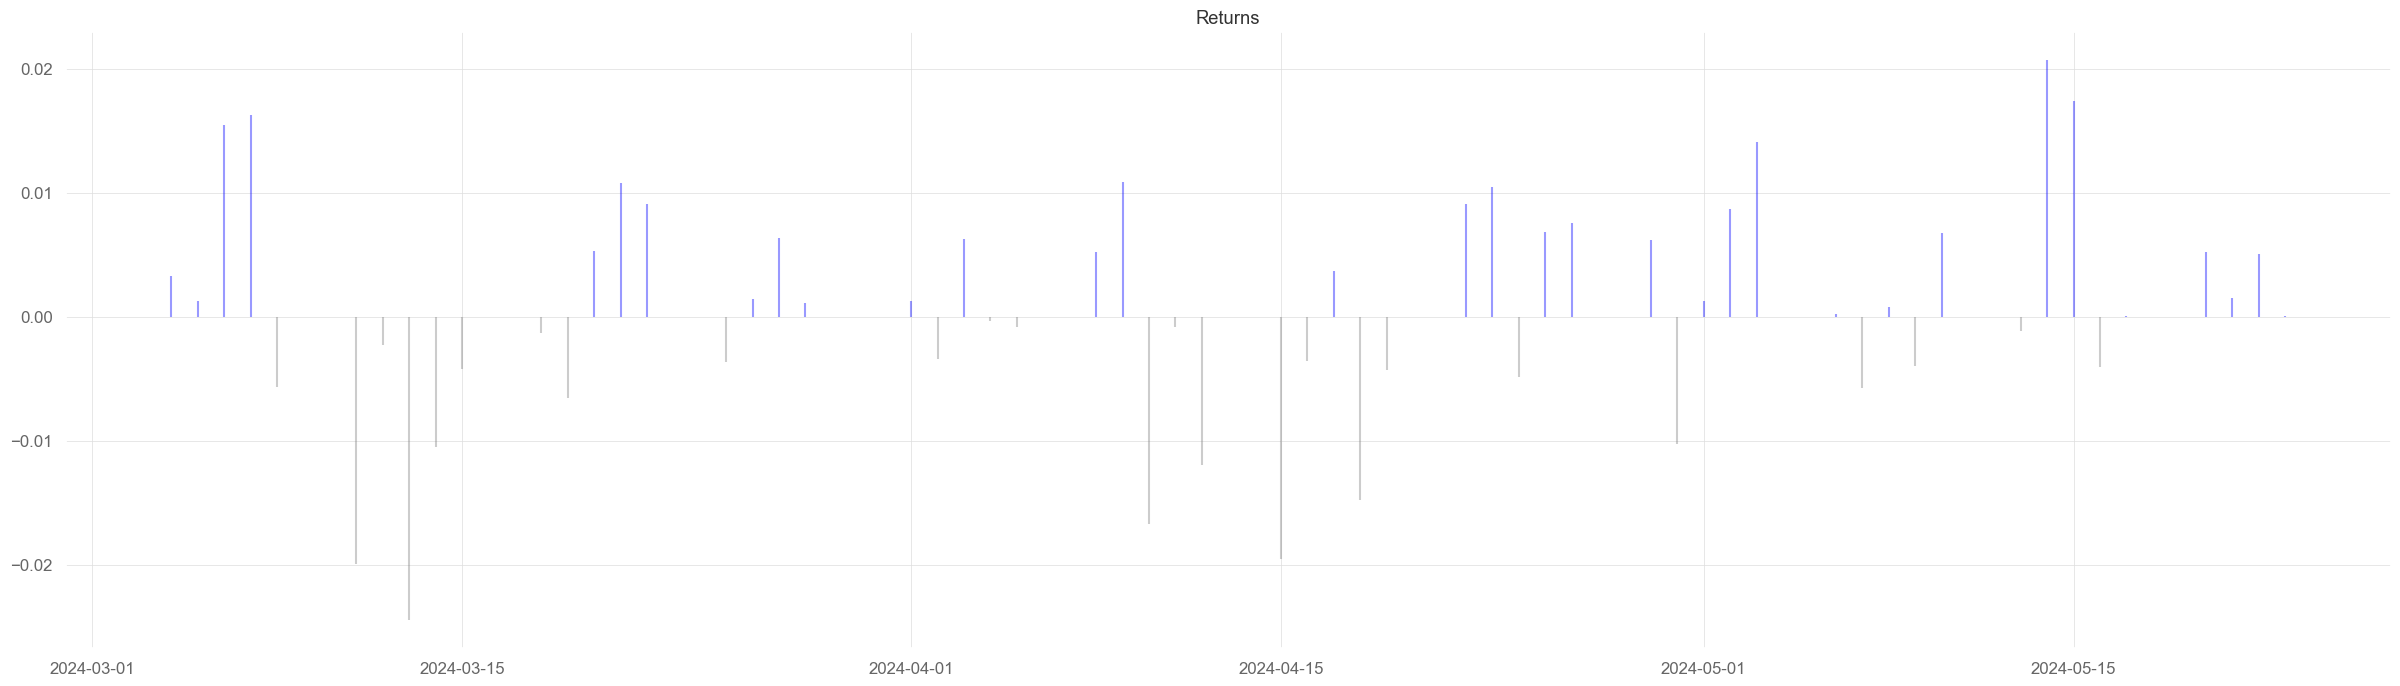

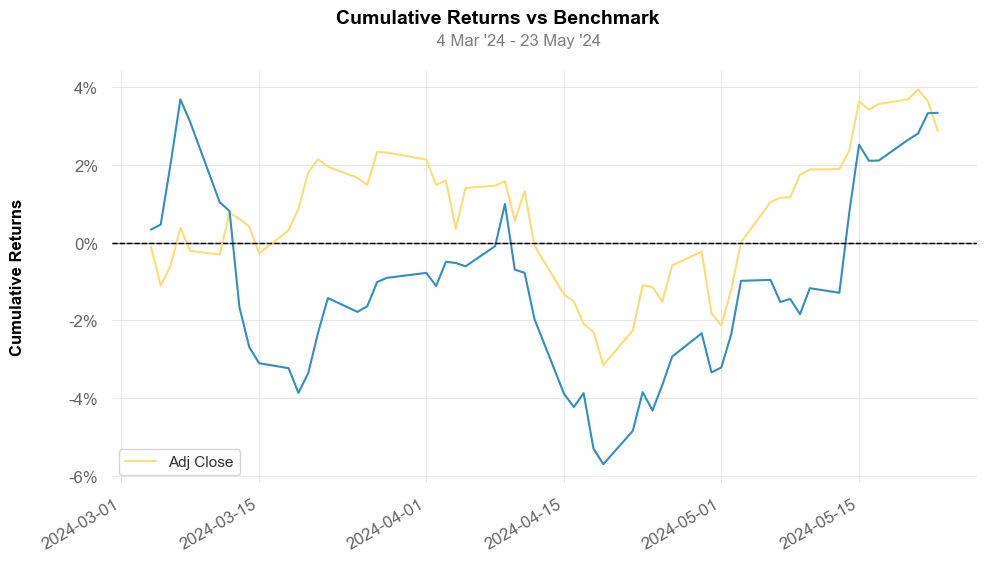

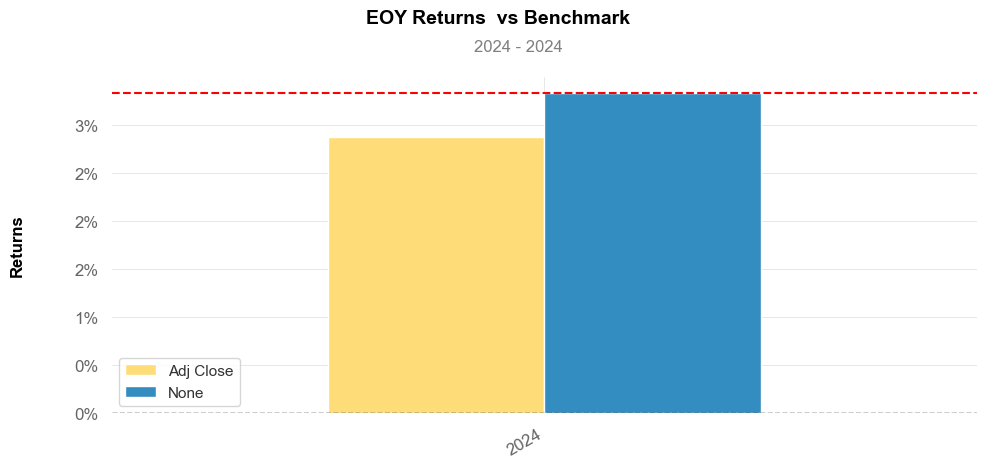

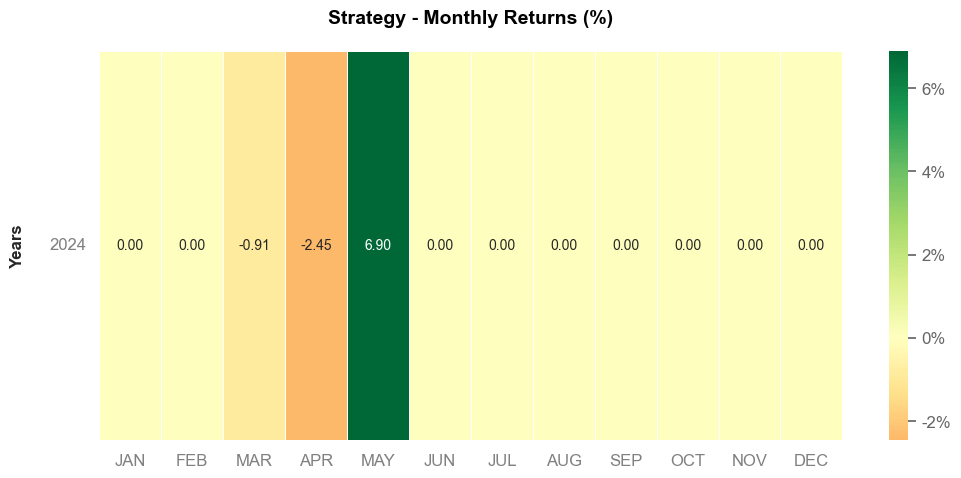

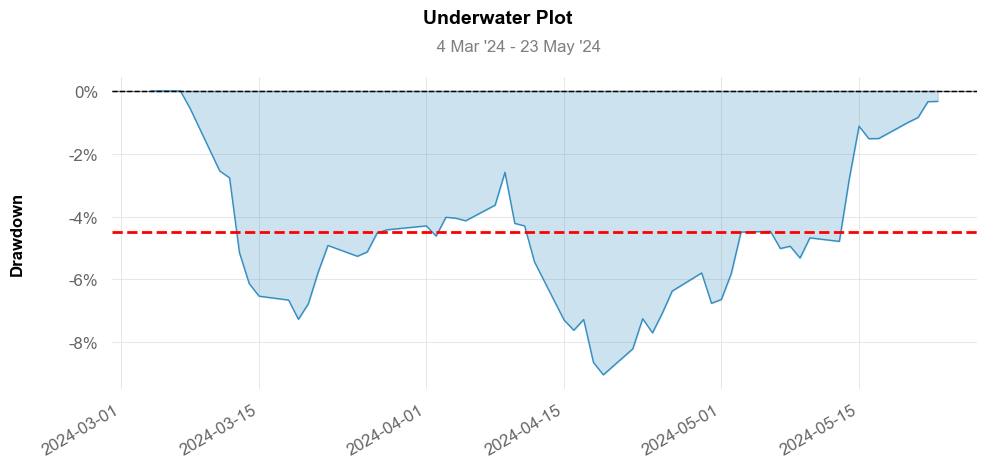

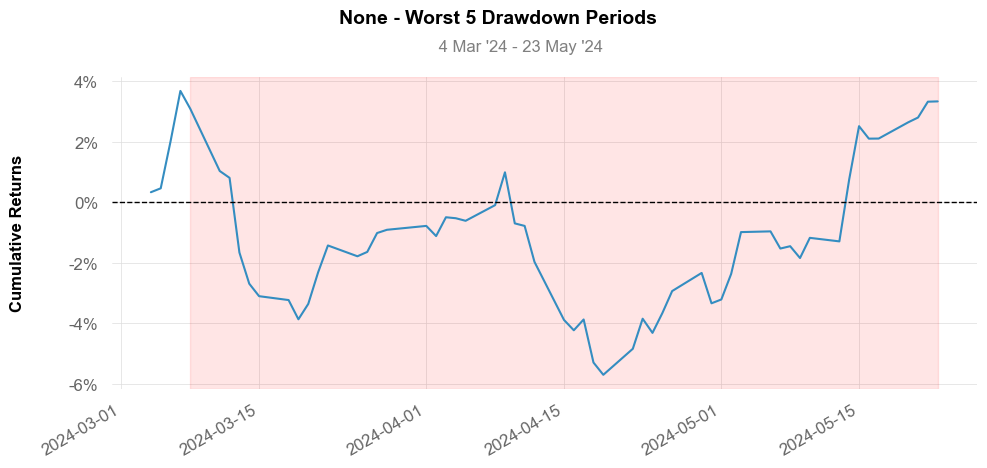

IndexError: index 0 is out of bounds for axis 0 with size 0

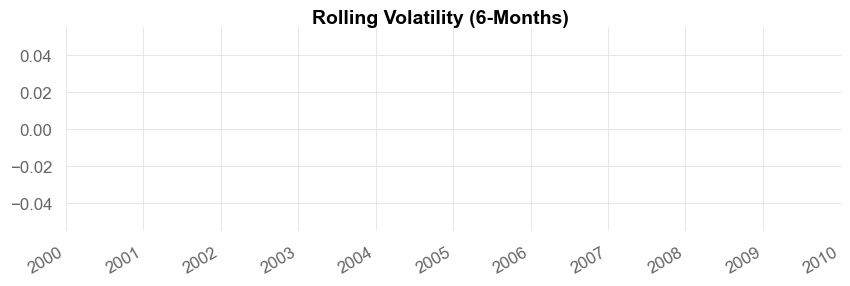

In [78]:
empyrial(portfolio)


In [12]:
import certifi
import ssl
ssl.create_default_context(cafile=certifi.where())

In [75]:
pip install flask empyrial


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 406.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 1.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [76]:
from flask import Flask, render_template, request
from empyrial import empyrial, Engine

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/backtest', methods=['POST'])
def backtest():
    start_date = request.form['start_date']
    portfolio = request.form['portfolio'].split(',')
    weights = list(map(float, request.form['weights'].split(',')))
    benchmark = request.form['benchmark'].split(',')

    portfolio_engine = Engine(
        start_date=start_date,
        portfolio=portfolio,
        weights=weights,
        benchmark=benchmark
    )
    result = empyrial(portfolio_engine)
    return render_template('result.html', result=result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/aaryanbhatia/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/aaryanbhatia/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/aaryanbhatia/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aaryanbhatia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/aaryanbhatia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 331, in init_s

SystemExit: 1

Start date: 2023-06-09
End date: 2024-07-23


,Backtest
,
Annual return,67.32%
Cumulative return,76.8%
Annual volatility,42.0 %
Winning day ratio,55.56%
Sharpe ratio,1.44
Calmar ratio,1.13
Information ratio,0.0
Stability,0.7
Max Drawdown,-37.45 %


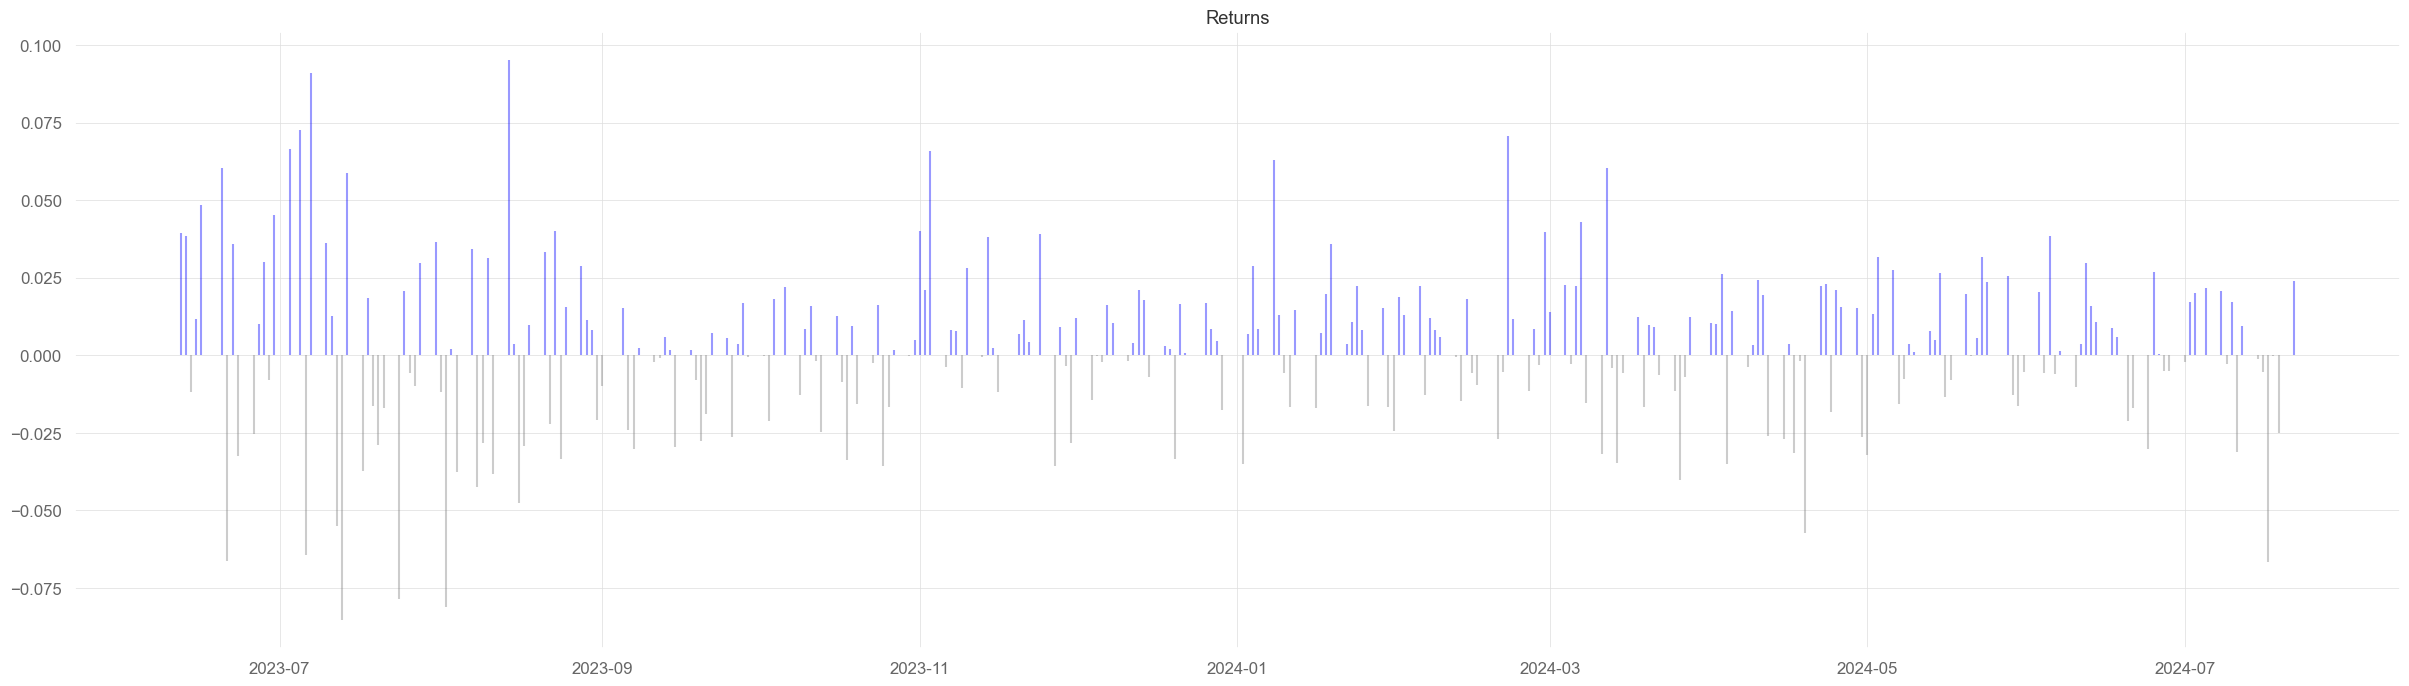

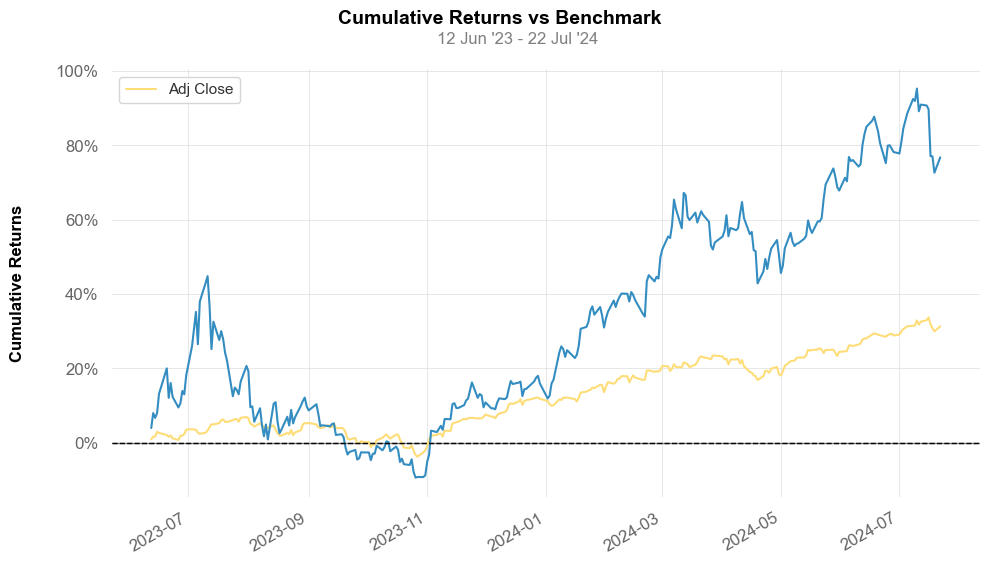

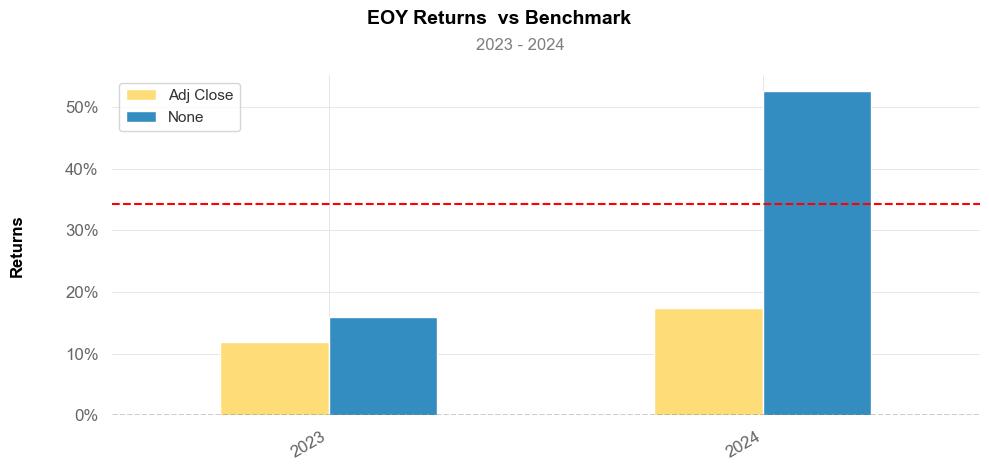

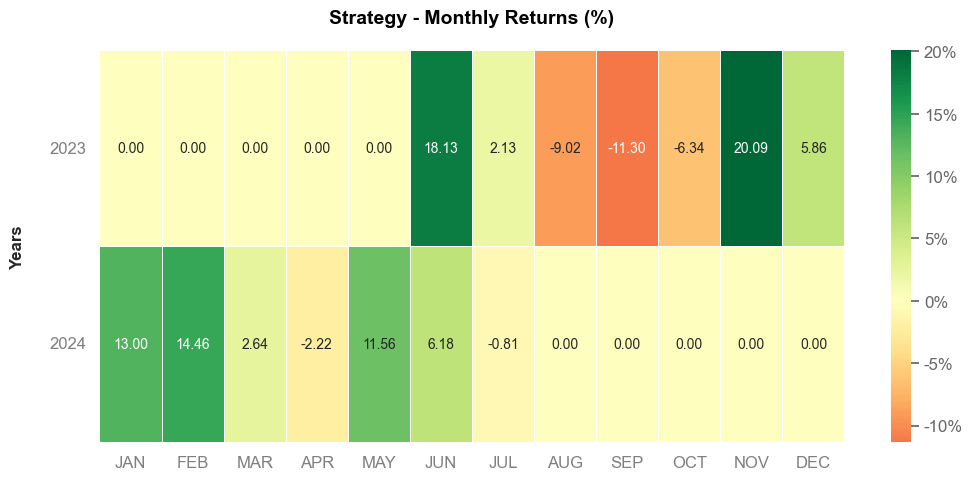

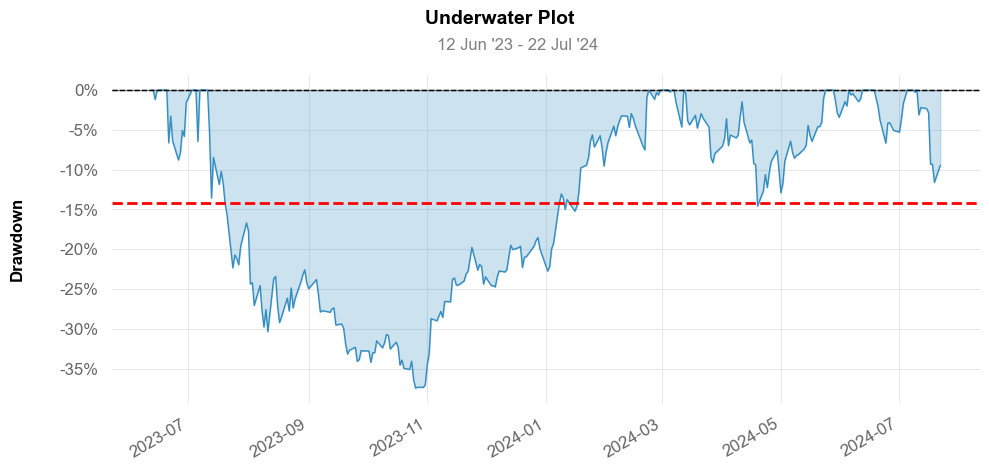

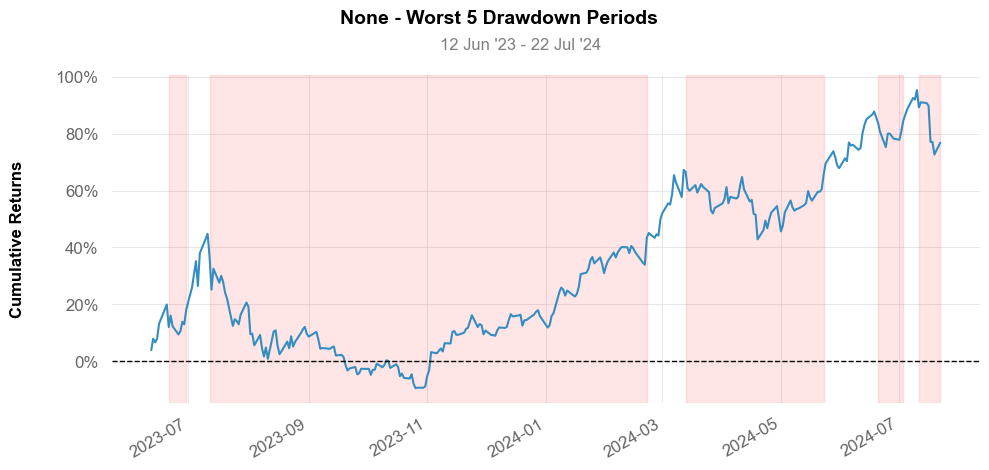

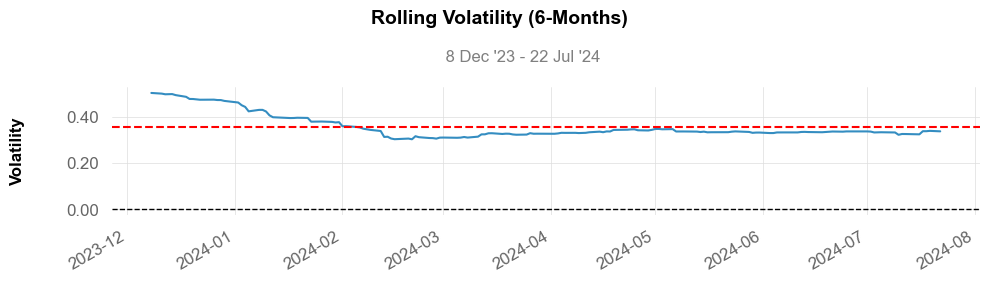

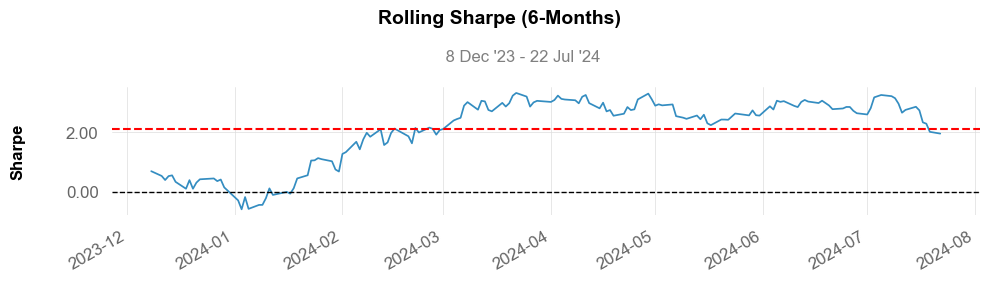

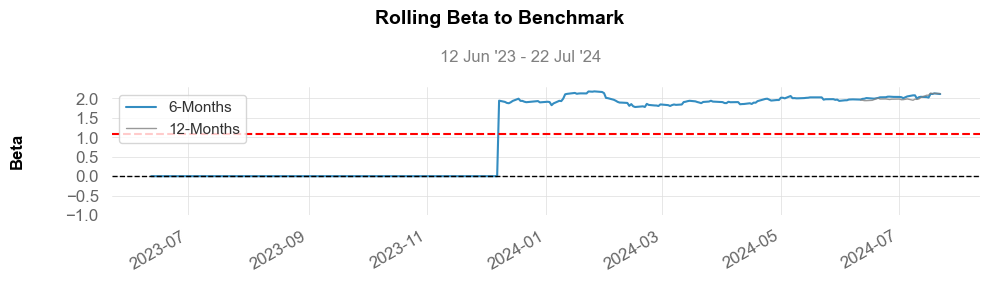

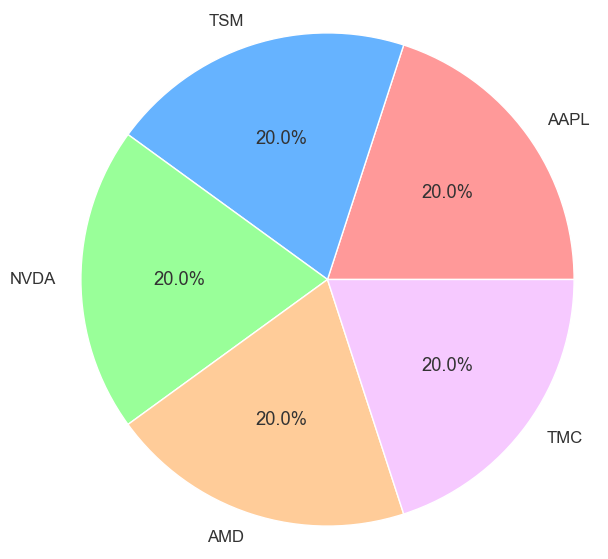

In [3]:
from empyrial import empyrial, Engine

portfolio = Engine(    
                  start_date= "2023-06-09", #start date for the backtesting
                  portfolio= ["AAPL", "TSM", "NVDA", "AMD","TMC"], #assets in your portfolio 
                  weights = [0.2, 0.2, 0.2, 0.2, 0.2], #equal weighting is set by default
                  benchmark = ["SPY"] #SPY is set by default
)

empyrial(portfolio)

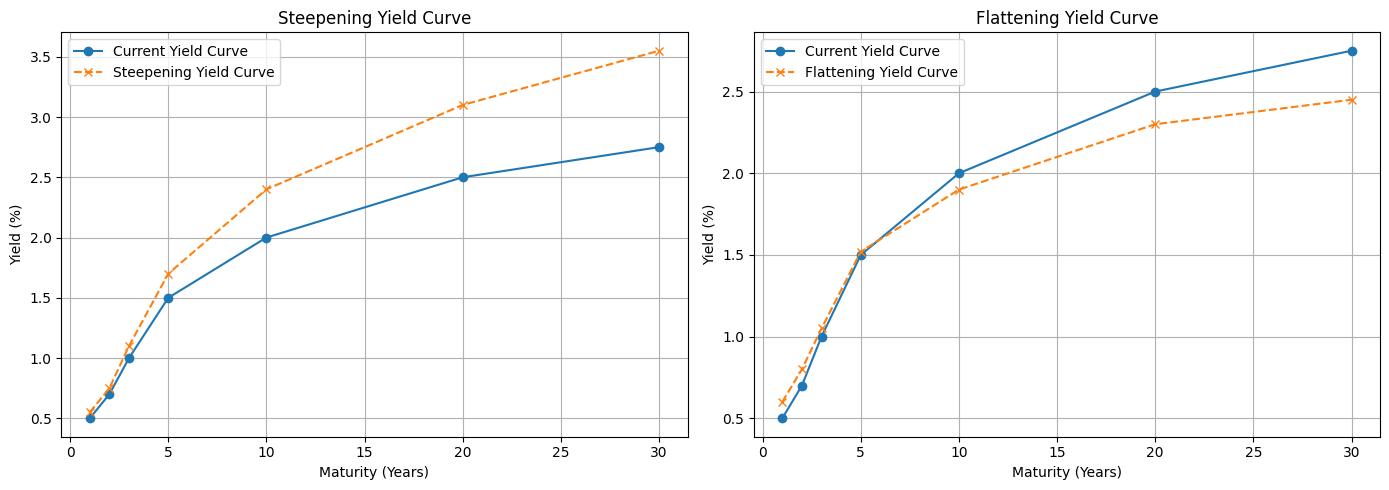

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Maturity periods in years
maturities = np.array([1, 2, 3, 5, 10, 20, 30])

# Hypothetical yield rates for the current yield curve
current_yields = np.array([0.5, 0.7, 1.0, 1.5, 2.0, 2.5, 2.75])

# Simulate a steepening yield curve (long-term rates increase more than short-term)
steepening_yields = current_yields + np.array([0.05, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8])

# Simulate a flattening yield curve (long-term rates increase less than short-term or decrease)
flattening_yields = current_yields + np.array([0.1, 0.1, 0.05, 0.02, -0.1, -0.2, -0.3])

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the steepening yield curve
ax1.plot(maturities, current_yields, marker='o', label='Current Yield Curve')
ax1.plot(maturities, steepening_yields, marker='x', linestyle='--', label='Steepening Yield Curve')
ax1.set_title('Steepening Yield Curve')
ax1.set_xlabel('Maturity (Years)')
ax1.set_ylabel('Yield (%)')
ax1.legend()
ax1.grid(True)

# Plotting the flattening yield curve
ax2.plot(maturities, current_yields, marker='o', label='Current Yield Curve')
ax2.plot(maturities, flattening_yields, marker='x', linestyle='--', label='Flattening Yield Curve')
ax2.set_title('Flattening Yield Curve')
ax2.set_xlabel('Maturity (Years)')
ax2.set_ylabel('Yield (%)')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
